# Disease prediction

## 2.0 - EDA uppvärmning


In [1]:
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import seaborn as sns



In [2]:
Cardio = pd.read_csv('Data/cardio_train.csv', sep=';') #delete semicolon using 'sep' based on:https://www.geeksforgeeks.org/python-sep-parameter-print/
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


- a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [3]:
Cardio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  int64  
 2   gender       70000 non-null  int64  
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  int64  
 8   gluc         70000 non-null  int64  
 9   smoke        70000 non-null  int64  
 10  alco         70000 non-null  int64  
 11  active       70000 non-null  int64  
 12  cardio       70000 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [4]:
cardio_count= Cardio.cardio.value_counts()
print(f'Number of positive cases for cardiovascular disease : {cardio_count[1]}')
print(f'Number of negative cases for cardiovascular disease : {cardio_count[0]}')

Number of positive cases for cardiovascular disease : 34979
Number of negative cases for cardiovascular disease : 35021


- b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [5]:
Cardio["cholesterol"].value_counts()

1    52385
2     9549
3     8066
Name: cholesterol, dtype: int64

Text(0.5, 1.0, 'kolesterolvärde')

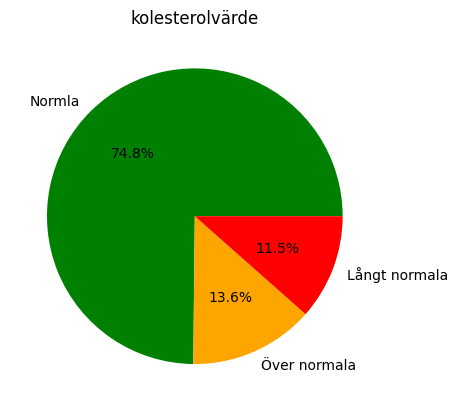

In [6]:
plt.pie(Cardio['cholesterol'].value_counts(), labels=["Normla", "Över normala", "Långt normala"], autopct="%1.1f%%", colors=["green", "orange", "red"])
plt.title('kolesterolvärde')

- c) Hur ser åldersfördelningen ut? Rita ett histogram.


<AxesSubplot: xlabel='Age', ylabel='Count'>

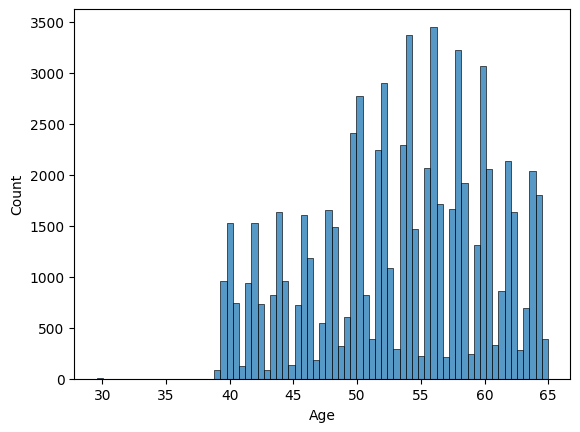

In [7]:
# age column is given in days so I need to convert it in years using pd
Age= pd.DataFrame({"Age": Cardio["age"]/365})
sns.histplot(Age["Age"])

- d) Hur stor andel röker?

In [8]:
Smokers= (Cardio["smoke"].value_counts()[1])
Smokers

6169

In [9]:
#get percentage
Smokers_andel=(Smokers/Cardio["smoke"].count())*100
print(f'Smokers are {Smokers_andel} % of the total.')

Smokers are 8.812857142857142 % of the total.


- e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

Text(0.5, 1.0, 'Viktfördelningen')

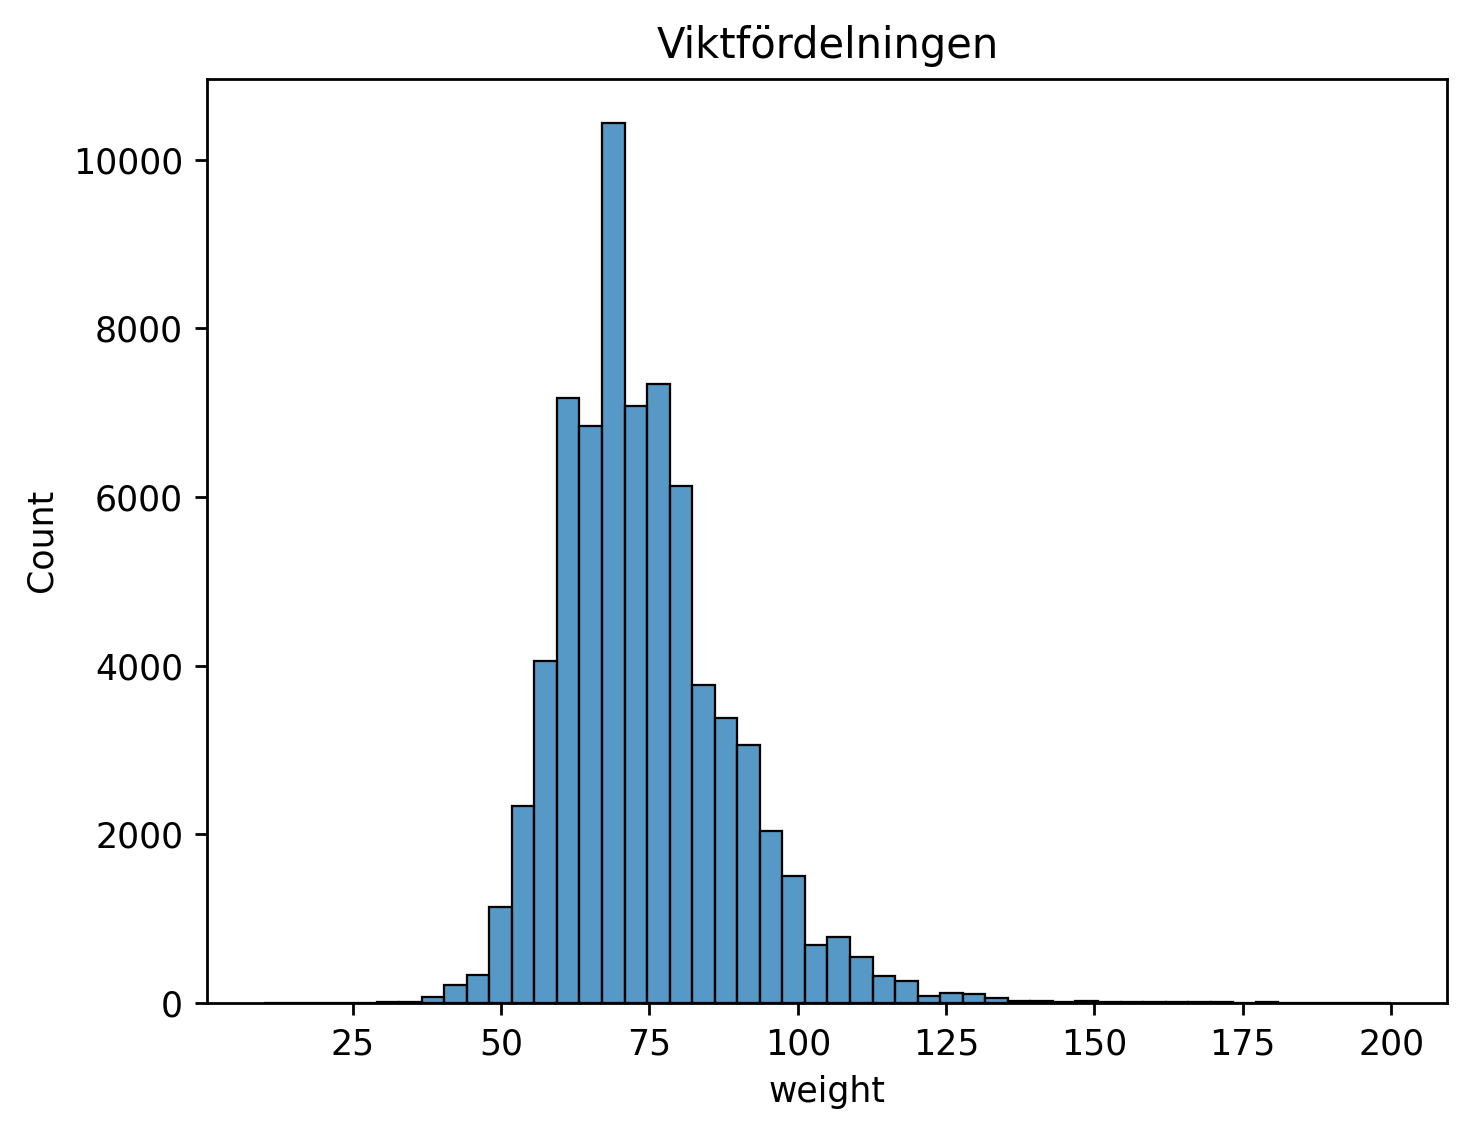

In [10]:
plt.figure(dpi=250)
sns.histplot(Cardio["weight"], bins=50)
plt.title("Viktfördelningen")


- f) Hur ser längdfördelningen ut? Rita lämpligt diagram.

Text(0.5, 1.0, 'Längdfördelningen')

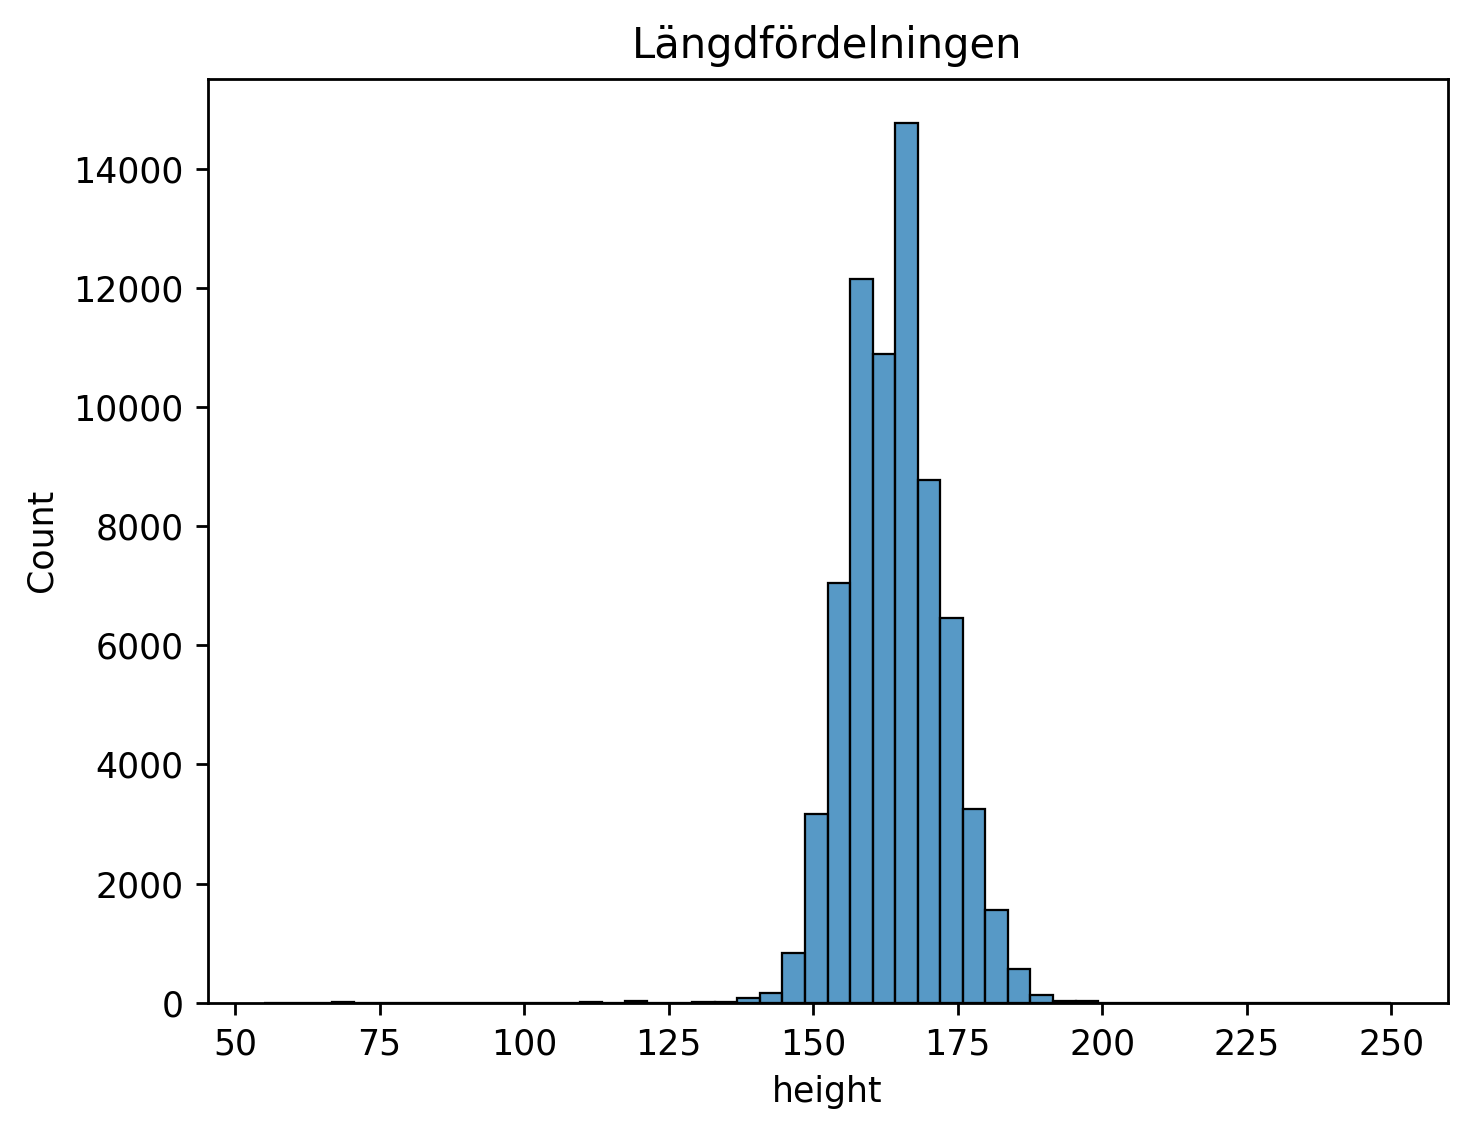

In [11]:
plt.figure(dpi=250)
sns.histplot(Cardio["height"], bins=50)
plt.title("Längdfördelningen")

- g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram


In [12]:
cardio_gender= Cardio.drop(Cardio[Cardio.cardio==0].index)
cardio_gender

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
7,12,22584,2,178,95.0,130,90,3,3,0,0,1,1
15,24,16782,2,172,112.0,120,80,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69993,99991,19699,1,172,70.0,130,90,1,1,0,0,1,1
69994,99992,21074,1,165,80.0,150,80,1,1,0,0,1,1
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1


Text(0.5, 1.0, 'könfördelning')

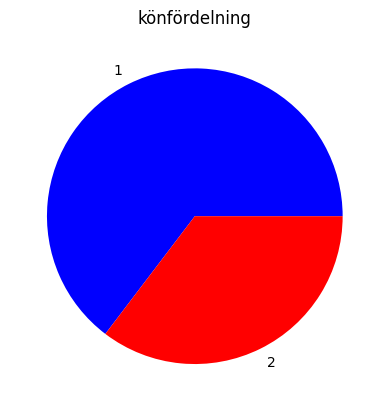

In [13]:
plt.pie(cardio_gender['gender'].value_counts(), labels=["1", "2"], colors=["blue", "red"])
plt.title('könfördelning')

# 2.1.0 - Feature engineering BMI

- a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv hur du gör avvägningen

In [14]:
#I started by calculating BMI
Cardio['BMI'] = Cardio['weight']/((Cardio['height']/100)**2)
Cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251


In [15]:
Cardio['BMI'].describe()

count    70000.000000
mean        27.556513
std          6.091511
min          3.471784
25%         23.875115
50%         26.374068
75%         30.222222
max        298.666667
Name: BMI, dtype: float64

- As we can see there are some wrong values because 'min' is up to 3 which is very low and 'max' is up to 298 which is very high.
- I need to do an examination of the data for unusual observations that are far removed from the mass of data. These points are often referred to as outliers. Two graphical techniques for identifying outliers, scatter plots and box plots. refrence:https://www.itl.nist.gov/div898/handbook/prc/section1/prc16.htm
- I will try the scatter plot:

<AxesSubplot: ylabel='BMI'>

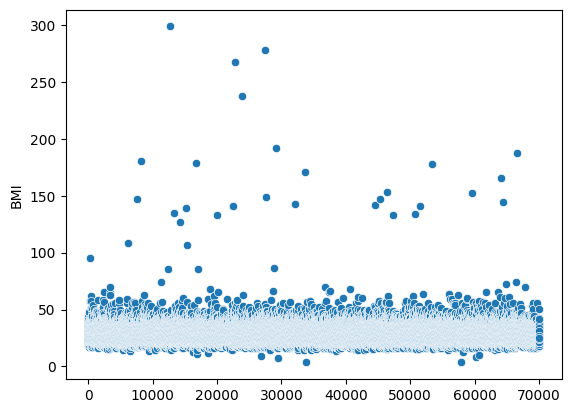

In [16]:
sns.scatterplot(data = Cardio['BMI'])

In [17]:
# Values analysis is based on categories existed in https://en.wikipedia.org/wiki/Body_mass_inde
#As we can see the data is skewed so some of them needs to be removed.

Drop_low_values= Cardio.index[Cardio['BMI'] < 16].to_list()
Drop_high_values= Cardio.index[Cardio['BMI'] < 50].to_list()
Drop=Drop_low_values + Drop_high_values
Data_Cardio=Cardio.drop(Drop)
Cardio=Cardio.reset_index(drop=True)
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177


- b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese(class II), obese (class III).

In [18]:
# Now i will set some conditions to categorize values
# based on https://www.dataquest.io/blog/tutorial-add-column-pandas-dataframe-based-on-if-else-condition/
# create a list of our conditions
conditions = [
    (Cardio['BMI'] <= 18),
    (Cardio['BMI'] > 18) & (Cardio['BMI'] < 25),
    (Cardio['BMI'] >= 25) & (Cardio['BMI'] < 30),
    (Cardio['BMI'] >= 30) & (Cardio['BMI'] < 35),
    (Cardio['BMI'] >= 35) & (Cardio['BMI'] < 40),
    (Cardio['BMI'] > 40)
    ]

# create a list of the values we want to assign for each condition
values = ['Undeweight', 'Normal weight','Overweight', 'Obesity(Class 1)', 'Obesity(Class 2)', 'Obesity(Class 3)']

# create a new column and use np.select to assign values to it using our lists as arguments
Cardio['BMI Category'] = np.select(conditions, values)

# display updated DataFrame
Cardio.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal weight
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obesity(Class 1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal weight
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal weight


# 2.1.1 - Feature engineering blodtryck

In [19]:
Cardio['ap_hi'].describe

<bound method NDFrame.describe of 0        110
1        140
2        130
3        150
4        100
        ... 
69995    120
69996    140
69997    180
69998    135
69999    120
Name: ap_hi, Length: 70000, dtype: int64>

In [20]:
Cardio['ap_lo'].describe()

count    70000.000000
mean        96.630414
std        188.472530
min        -70.000000
25%         80.000000
50%         80.000000
75%         90.000000
max      11000.000000
Name: ap_lo, dtype: float64

<AxesSubplot: >

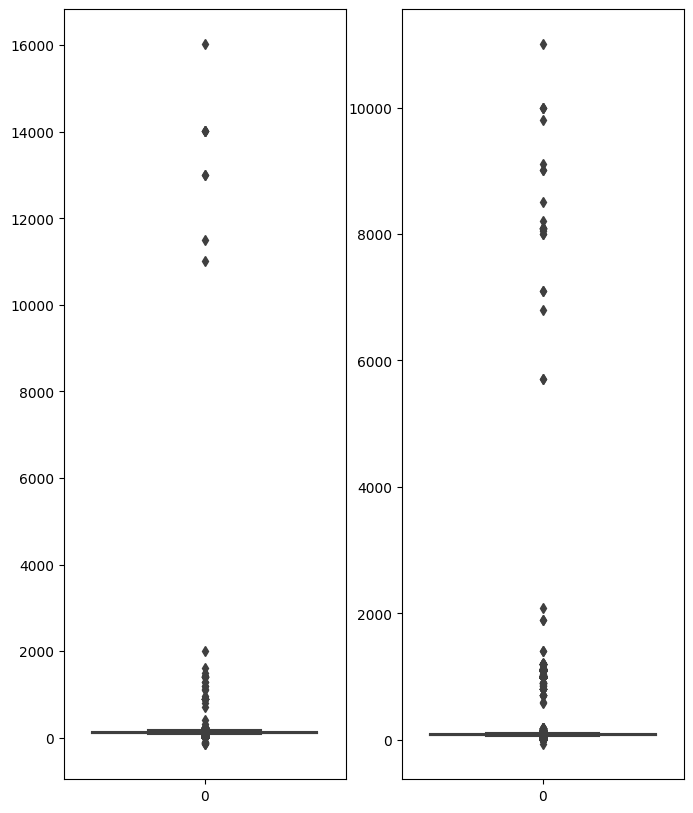

In [21]:
fig, axes = plt.subplots(1,2, figsize=(8,10), dpi=100)
sns.boxplot(data = Cardio['ap_hi'], ax = axes[0])
sns.boxplot(data = Cardio['ap_lo'], ax = axes[1])

In [22]:
#the data is skewed so I will remove very high and very low values
# I will remove values that are out of range 60<ap_lo>150 and 90<ap_hi>200 
Cardio= Cardio.drop(Cardio[Cardio['ap_hi'] < 90].index)
Cardio= Cardio.drop(Cardio[Cardio['ap_hi'] > 200].index)
Cardio


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal weight
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obesity(Class 1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal weight
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,Obesity(Class 3)
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obesity(Class 1)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


In [23]:
Cardio= Cardio.drop(Cardio[Cardio['ap_lo'] < 60].index)
Cardio= Cardio.drop(Cardio[Cardio['ap_lo'] > 150].index)
Cardio

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal weight
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obesity(Class 1)
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal weight
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal weight
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,Obesity(Class 3)
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obesity(Class 1)
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight


In [24]:
Cardio.count()

id              68473
age             68473
gender          68473
height          68473
weight          68473
ap_hi           68473
ap_lo           68473
cholesterol     68473
gluc            68473
smoke           68473
alco            68473
active          68473
cardio          68473
BMI             68473
BMI Category    68473
dtype: int64

In [25]:
# Now i will set some conditions to categorize values
# modifications in symbol conditions based on https://www.w3schools.com/python/python_operators.asp

conditions_bp = [
    (Cardio['ap_lo'] < 80) & (Cardio['ap_hi'] < 120),
    (Cardio['ap_lo'] < 80) & (Cardio['ap_hi'] >= 120) & (Cardio['ap_hi'] <= 129),
    (Cardio['ap_lo'] >= 80) & (Cardio['ap_lo'] >= 89) | (Cardio['ap_hi'] > 129) & (Cardio['ap_hi'] <= 139),
    (Cardio['ap_lo'] > 89) & (Cardio['ap_lo'] <= 119) | (Cardio['ap_hi'] > 139) & (Cardio['ap_hi'] <= 180),
    (Cardio['ap_lo'] > 180) & (Cardio['ap_hi'] > 120),
    ]

# create a list of the values we want to assign for each condition
values_bp = ['Healthy', 'Elevated','Stage 1 hypertension', 'Stage 2 hypertension', 'Hypertension crisis']

# create a new column and use np.select to assign values to it using our lists as arguments
Cardio['Blood Pressure Category'] = np.select(conditions_bp, values_bp)

# display updated DataFrame
Cardio 

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI Category,Blood Pressure Category
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,21.967120,Normal weight,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,34.927679,Obesity(Class 1),Stage 1 hypertension
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,23.507805,Normal weight,Stage 1 hypertension
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,28.710479,Overweight,Stage 1 hypertension
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,23.011177,Normal weight,Healthy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,168,76.0,120,80,1,1,1,0,1,0,26.927438,Overweight,0
69996,99995,22601,1,158,126.0,140,90,2,2,0,0,1,1,50.472681,Obesity(Class 3),Stage 1 hypertension
69997,99996,19066,2,183,105.0,180,90,3,1,0,1,0,1,31.353579,Obesity(Class 1),Stage 1 hypertension
69998,99998,22431,1,163,72.0,135,80,1,2,0,0,0,1,27.099251,Overweight,Stage 1 hypertension


## 2.2.0 - Visualiseringar andel sjukdomar

[Text(0, 0, 'Normal'),
 Text(1, 0, 'Above Normal'),
 Text(2, 0, 'Well Above Normal')]

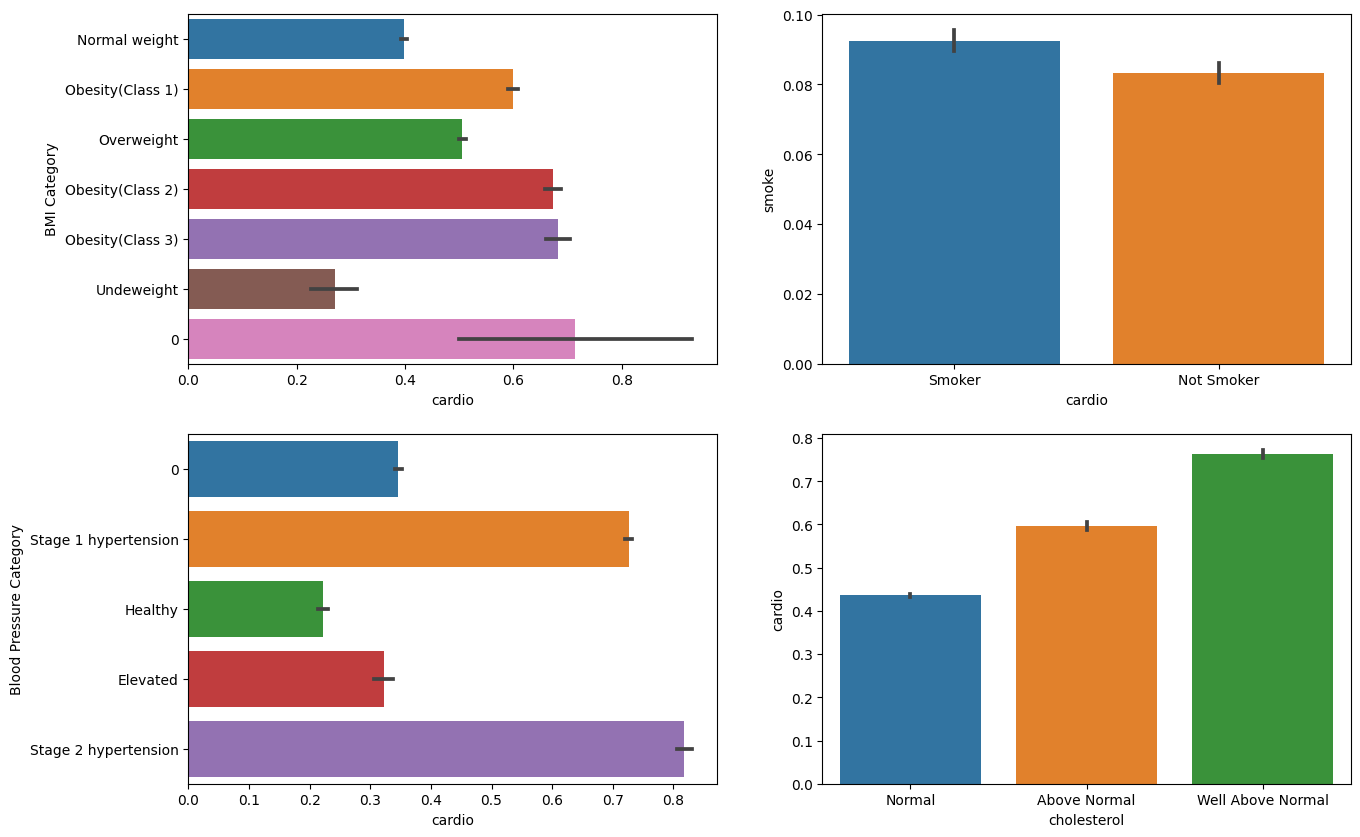

In [26]:
fig, axes= plt.subplots(2,2, figsize=(15, 10), dpi=100)
sns.barplot(data=Cardio, x='cardio', y='BMI Category', ax= axes[0,0])
sns.barplot(data=Cardio, x='cardio', y='Blood Pressure Category', ax= axes[1,0])
sns.barplot(data=Cardio, x='cardio', y='smoke', ax= axes[0,1]).set_xticklabels(['Smoker', 'Not Smoker'])
sns.barplot(data=Cardio, x='cholesterol', y='cardio', ax= axes[1,1]).set_xticklabels(['Normal', 'Above Normal', 'Well Above Normal'])

## 2.2.1 - Visualiseringar korrelation

In [27]:
Data_korr=Cardio.drop(columns=['id', 'BMI Category', 'Blood Pressure Category'])

<AxesSubplot: >

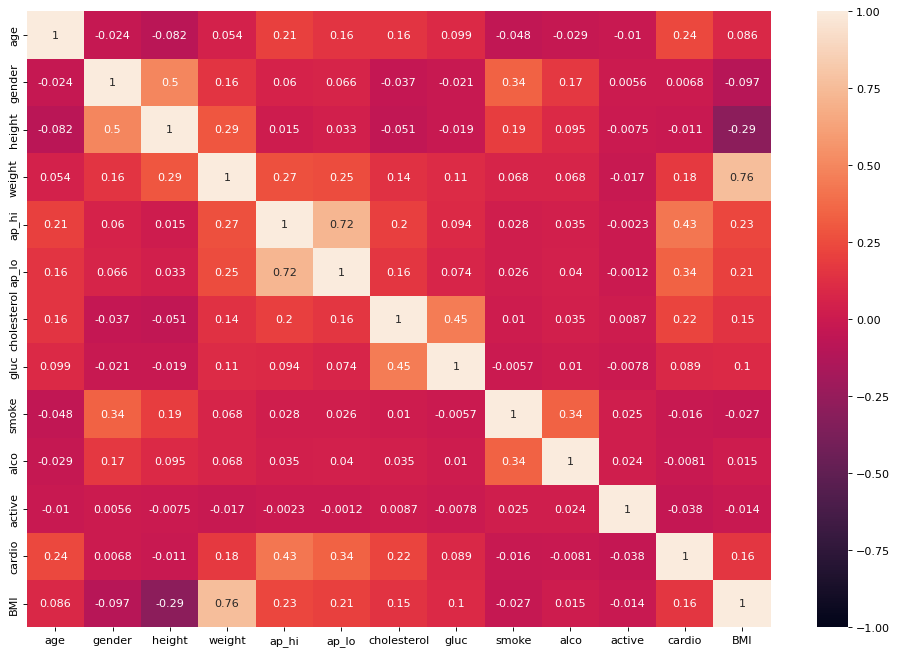

In [28]:

fig, axes= plt.subplots(figsize=(15, 10), dpi=80)
sns.heatmap(Data_korr.corr(), vmin = -1, vmax= 1, annot=True)

Interpretation : 
There is a correlation between:
 - weight and BMI (corr=0.76) which is logic because weight is used to calculate BMI. 
 - ap_hi and ap_lo diastolic and systolic blood pressure (corr=0.72).
 - Glucose and cholesterol levels (corr=0.45) which can be explained by the fact that both are related to unbalanced diet. When we eat too much sugar, the liver makes more LDL (bad fat) while lowering the amount of HDL (good fat) in our body. The extra calories from a sugary diet also leads to more of something called triglycerides, a type of blood fat that plays a role in the cholesterol status.


## 2.3 - Skapa två dataset


In [29]:
Data1= Cardio.drop(columns=['ap_hi', 'ap_lo', 'height', 'weight', 'BMI'])
Data1

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI Category,Blood Pressure Category
0,0,18393,2,1,1,0,0,1,0,Normal weight,0
1,1,20228,1,3,1,0,0,1,1,Obesity(Class 1),Stage 1 hypertension
2,2,18857,1,3,1,0,0,0,1,Normal weight,Stage 1 hypertension
3,3,17623,2,1,1,0,0,1,1,Overweight,Stage 1 hypertension
4,4,17474,1,1,1,0,0,0,0,Normal weight,Healthy
...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,1,1,1,0,1,0,Overweight,0
69996,99995,22601,1,2,2,0,0,1,1,Obesity(Class 3),Stage 1 hypertension
69997,99996,19066,2,3,1,0,1,0,1,Obesity(Class 1),Stage 1 hypertension
69998,99998,22431,1,1,2,0,0,0,1,Overweight,Stage 1 hypertension


In [30]:
#get one hot encoding based on: https://www.geeksforgeeks.org/ml-one-hot-encoding-of-datasets-in-python/
one_hot_encoded_data1 = pd.get_dummies(Data1, columns = ['BMI Category', 'Blood Pressure Category', 'gender'])
one_hot_encoded_data1

,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI Category_0,BMI Category_Normal weight,...,BMI Category_Obesity(Class 3),BMI Category_Overweight,BMI Category_Undeweight,Blood Pressure Category_0,Blood Pressure Category_Elevated,Blood Pressure Category_Healthy,Blood Pressure Category_Stage 1 hypertension,Blood Pressure Category_Stage 2 hypertension,gender_1,gender_2
0,0,18393,1,1,0,0,1,0,0,1,...,0,0,0,1,0,0,0,0,0,1
1,1,20228,3,1,0,0,1,1,0,0,...,0,0,0,0,0,0,1,0,1,0
2,2,18857,3,1,0,0,0,1,0,1,...,0,0,0,0,0,0,1,0,1,0
3,3,17623,1,1,0,0,1,1,0,0,...,0,1,0,0,0,0,1,0,0,1
4,4,17474,1,1,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,1,1,1,0,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1
69996,99995,22601,2,2,0,0,1,1,0,0,...,1,0,0,0,0,0,1,0,1,0
69997,99996,19066,3,1,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,1
69998,99998,22431,1,2,0,0,0,1,0,0,...,0,1,0,0,0,0,1,0,1,0


In [31]:
Data2= Cardio.drop(columns=['BMI Category', 'Blood Pressure Category', 'height', 'weight'])
Data2

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,18393,2,110,80,1,1,0,0,1,0,21.967120
1,1,20228,1,140,90,3,1,0,0,1,1,34.927679
2,2,18857,1,130,70,3,1,0,0,0,1,23.507805
3,3,17623,2,150,100,1,1,0,0,1,1,28.710479
4,4,17474,1,100,60,1,1,0,0,0,0,23.011177
...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,2,120,80,1,1,1,0,1,0,26.927438
69996,99995,22601,1,140,90,2,2,0,0,1,1,50.472681
69997,99996,19066,2,180,90,3,1,0,1,0,1,31.353579
69998,99998,22431,1,135,80,1,2,0,0,0,1,27.099251


In [32]:
one_hot_encoded_data2 = pd.get_dummies(Data2, columns = ['gender'])
one_hot_encoded_data2

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_1,gender_2
0,0,18393,110,80,1,1,0,0,1,0,21.967120,0,1
1,1,20228,140,90,3,1,0,0,1,1,34.927679,1,0
2,2,18857,130,70,3,1,0,0,0,1,23.507805,1,0
3,3,17623,150,100,1,1,0,0,1,1,28.710479,0,1
4,4,17474,100,60,1,1,0,0,0,0,23.011177,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,99993,19240,120,80,1,1,1,0,1,0,26.927438,0,1
69996,99995,22601,140,90,2,2,0,0,1,1,50.472681,1,0
69997,99996,19066,180,90,3,1,0,1,0,1,31.353579,0,1
69998,99998,22431,135,80,1,2,0,0,0,1,27.099251,1,0


## 2.4 - Välja modell


Välj 3-5 maskininlärningsmodeller, gärna så olika som möjligt. För varje dataset som vi skapade i uppgift 2.3
gör följande:
- train|validation|test split
- skala datasetet med feature standardization och normalization
- definiera hyperparametrar (param_grids) att testa för varje modell
- Kokchun Giang Labb maskininlärning
4 / 5
- använda GridSearchCV() och välja lämplig evalueringsmetric
- gör prediction på valideringsdata
- beräkna och spara evaluation score för ditt valda metric
- checka bästa parametrarna för respektive modell


I chose this 3 models:
- Logistic regression
- Decision Tree
- SVM


Split Data

In [33]:
from sklearn.model_selection import train_test_split,  GridSearchCV

#Split Data1
X1,y1 = one_hot_encoded_data1.drop('cardio', axis=1),one_hot_encoded_data1['cardio']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X1, y1, test_size=0.3, random_state=42)
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_test1, y_test1, test_size=0.5, random_state=42)
X_train1.shape, y_train1.shape, X_val1.shape, y_val1.shape, X_test1.shape, y_test1.shape

((47931, 21), (47931,), (10271, 21), (10271,), (10271, 21), (10271,))

In [34]:
#Split Data2
X2,y2 = one_hot_encoded_data2.drop('cardio', axis=1),one_hot_encoded_data2['cardio']
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.3, random_state=42)
X_val2, X_test2, y_val2, y_test2 = train_test_split(X_test2, y_test2, test_size=0.5, random_state=42)
X_train2.shape, y_train2.shape, X_val2.shape, y_val2.shape, X_test2.shape, y_test2.shape

((47931, 12), (47931,), (10271, 12), (10271,), (10271, 12), (10271,))

Skala Data

In [35]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

##Data1
#Standardization
scaler_sd = StandardScaler()
sd_X_train1 = scaler_sd.fit_transform(X_train1)
sd_X_val1 = scaler_sd.transform(X_val1)
#normalization
scaler_nor= MinMaxScaler()
nor_X_train1 = scaler_nor.fit_transform(X_train1)
nor_X_val1 = scaler_nor.fit_transform(X_val1)


##Data2
#Standardization
scaler_sd = StandardScaler()
sd_X_train2 = scaler_sd.fit_transform(X_train2)
sd_X_val2 = scaler_sd.transform(X_val2)
#normalization
scaler_nor= MinMaxScaler()
nor_X_train2 = scaler_nor.fit_transform(X_train2)
nor_X_val2 = scaler_nor.fit_transform(X_val2)


- Logistic regression

In [36]:
from sklearn.linear_model import LogisticRegression
Log_model= LogisticRegression (solver='saga', fit_intercept= True )
Logreg={'C':[10000, 100,10, 1, 0.1], 'penalty':['l1', 'l2']}
Log = GridSearchCV(Log_model, Logreg, cv=5, scoring="recall")

#Data1
Log.fit(sd_X_train1, y_train1)
print(f'Best parameter: {Log.best_params_}')
print(f'Best score: {Log.best_score_}')

c:\Users\Amal Derbali\.virtualenvs\AmalDerbali-Lab-Machine-Learning-cie7Ulfe\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Amal Derbali\.virtualenvs\AmalDerbali-Lab-Machine-Learning-cie7Ulfe\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Amal Derbali\.virtualenvs\AmalDerbali-Lab-Machine-Learning-cie7Ulfe\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Amal Derbali\.virtualenvs\AmalDerbali-Lab-Machine-Learning-cie7Ulfe\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\Amal Derbali\.virtualenvs\AmalDerbali-Lab-Machine-Learning-cie7Ulfe\lib

Best parameter: {'C': 0.1, 'penalty': 'l1'}
Best score: 0.6760955423712789


c:\Users\Amal Derbali\.virtualenvs\AmalDerbali-Lab-Machine-Learning-cie7Ulfe\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


In [37]:
#Data2
Log.fit(sd_X_train2, y_train2)
print(f'Best parameter: {Log.best_params_}')
print(f'Best score: {Log.best_score_}')

Best parameter: {'C': 0.1, 'penalty': 'l1'}
Best score: 0.6618676000514349


- Support Vector Machine

In [38]:

from sklearn.svm import SVC
from sklearn import svm


In [56]:
# I tried SVM but it doesnt work properly so I will try KNN instead
from sklearn.neighbors import KNeighborsClassifier
KNN_model= KNeighborsClassifier(n_neighbors=7, weights='uniform', algorithm='auto')
param_grid_knn= {'n_neighbors': range(1, 10),
                
                #'metric': ['euclidean', 'manhattan']
                
                }
KNN= GridSearchCV(KNN_model, param_grid_knn, cv=5, scoring= 'accuracy', verbose=1)

 

In [57]:
#Data1
KNN.fit(sd_X_train1, y_train1)

print(f'Best score: {KNN.best_score_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


In [55]:
#Data1
KNN.fit(sd_X_train2, y_train2)
print(f'Best parameter: {KNN.best_params_}')
print(f'Best score: {KNN.best_score_}')

Fitting 5 folds for each of 9 candidates, totalling 45 fits


KeyboardInterrupt: 

- Decision Tree

In [ ]:
#Data1
